### Spatially Seperable Convolution
Model Accuracy : 72.01%

## Importing Keras Libraries and Modules


In [0]:
from keras import backend as K
import numpy as np
import time
# Importing matplot library
import matplotlib.pyplot as plt
% matplotlib inline
# Seed the generator
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,Input,add
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv2D,SeparableConv2D
from keras.layers import GlobalAveragePooling2D

##Importing Cifar10 dataset

In [0]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

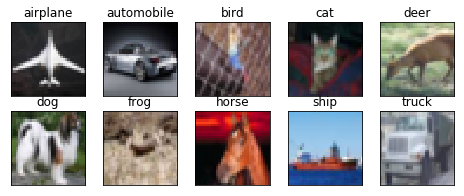

In [0]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model

from keras.models import Model
input_img = Input(shape=(32,32,3))

Conv1 = Conv2D(32,3,3, activation ='relu', border_mode ='same',name ='Conv1')(input_img)
BN1 = BatchNormalization(name='bn1')(Conv1)
MaxPool1 = MaxPooling2D((2,2), name='pool1')(BN1)

# Spatially Seperable Convolution Layer 1
SepConv1 = SeparableConv2D(32,3,1, activation='relu',border_mode ='same', name='SepConv1')(MaxPool1) #3x1
BN2 = BatchNormalization(name='bn2')(SepConv1)
SepConv1_1 = SeparableConv2D(32,1,3, activation='relu',border_mode ='same', name='SepConv1_1')(BN2)  #1x3
BN2_1 = BatchNormalization(name='bn2_1')(SepConv1_1)
MaxPool2_1 = MaxPooling2D((2,2),name='pool2_1')(BN2_1)

#Spatially Seperable Convolution Layer 2
SepConv2 = SeparableConv2D(64,3,1, activation='relu',border_mode ='same', name='SepConv2')(MaxPool2_1) #3x1
BN3 = BatchNormalization(name='bn3')(SepConv2)
SepConv2_1 = SeparableConv2D(64,1,3, activation='relu',border_mode ='same', name='SepConv2_1')(BN3) #1x3
BN3_1 = BatchNormalization(name='bn3_1')(SepConv2_1)
MaxPool3_1 = MaxPooling2D((2,2), name='pool3_1')(BN3_1)


#Spatially Seperable Convolution Layer 3
SepConv3 = SeparableConv2D(128,3,1, activation='relu',border_mode ='same', name='SepConv3')(MaxPool3_1) #3x1
BN4 = BatchNormalization(name='bn4')(SepConv3)
SepConv3_1 = SeparableConv2D(128,1,3, activation='relu',border_mode ='same', name='SepConv3_1')(BN4) #1x3
BN4_1 = BatchNormalization(name='bn4_1')(SepConv3_1)
MaxPool4_1 = MaxPooling2D((2,2), name='pool4_1')(BN4_1)


# Global average pooling
GAP = GlobalAveragePooling2D(name='G_avg_pool')(MaxPool4_1)

dense1 = Dense(128, activation='relu', name='fc1')(GAP)
output = Dense(10, activation='softmax')(dense1)
model = Model(inputs=input_img, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="Conv1", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 1), activation="relu", name="SepConv1", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (1, 3), activation="relu", name="SepConv1_1", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 1), activation="relu", name="SepConv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 32)        0         
_________________________________________________________________
SepConv1 (SeparableConv2D)   (None, 16, 16, 32)        1152      
_________________________________________________________________
bn2 (BatchNormalization)     (None, 16, 16, 32)        128       
_________________________________________________________________
SepConv1_1 (SeparableConv2D) (None, 16, 16, 32)        1152      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=(array([[[..., verbose=1, steps_per_epoch=781)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
781/781 [==============================] - 21s 26ms/step - loss: 1.4647 - acc: 0.4655 - val_loss: 1.4430 - val_acc: 0.4976
Epoch 2/50
781/781 [==============================] - 13s 17ms/step - loss: 1.1470 - acc: 0.5890 - val_loss: 1.1542 - val_acc: 0.5907
Epoch 3/50
781/781 [==============================] - 13s 17ms/step - loss: 1.0150 - acc: 0.6430 - val_loss: 1.4270 - val_acc: 0.5103
Epoch 4/50
781/781 [==============================] - 14s 17ms/step - loss: 0.9323 - acc: 0.6681 - val_loss: 1.3399 - val_acc: 0.5437
Epoch 5/50
781/781 [==============================] - 14s 17ms/step - loss: 0.8621 - acc: 0.6946 - val_loss: 0.9881 - val_acc: 0.6575
Epoch 6/50
781/781 [==============================] - 14s 18ms/step - loss: 0.8016 - acc: 0.7174 - val_loss: 1.1682 - val_acc: 0.6059
Epoch 7/50
781/781 [==============================] - 14s 17ms/step - loss: 0.7512 - acc: 0.7340 - val_loss: 1.1245 - val_acc: 0.6270
Epoch 8/50
781/781 [==============================] - 14s 17ms

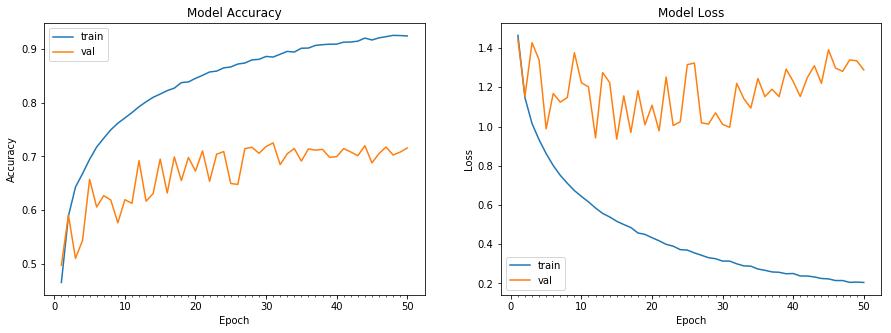

Accuracy on test data is: 71.58


In [0]:
# Image Normalization
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))